# **APRENDIZAGEM SUPERVISIONADA: REGRESSÃO**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever o valor do preço médio de casas em Boston. 

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/schirmerchad/bostonhoustingmlnd

In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('dados/housing.csv',
                    sep=',', encoding='iso-8859-1')

In [8]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


**Atributos previsores**

RM: é o número médio de cômodos entre os imóveis no bairro.

LSTAT: é a porcentagem de proprietários no bairro considerados de "classe baixa" (proletariado).

PTRATIO: é a razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro.

**Variável alvo**

MEDV: valor médio das casas

In [9]:
df.shape

(489, 4)

## **EXPLORAÇÃO E TRATAMENTO DOS DADOS**

Valores Missing (NAN)

In [10]:
# RELAÇÃO DA QUANTIDADE
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

**Análise dos tipos de atributos.**

In [11]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
df.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

**Dados Estatísticos**

In [12]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


**Análise dos outliers**

In [13]:
import plotly.express as px

In [14]:
boxplot = px.box(df, y="RM")
boxplot.show()

In [15]:
boxplot = px.box(df, y="LSTAT")
boxplot.show()

In [16]:
boxplot = px.box(df, y="PTRATIO")
boxplot.show()

In [17]:
boxplot = px.box(df, y="MEDV")
boxplot.show()

## **CORRELAÇÃO LINEAR**

In [18]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


**Atributos previsores**

RM: é o número médio de cômodos entre os imóveis no bairro.

LSTAT: é a porcentagem de proprietários no bairro considerados de "classe baixa" (proletariado).

PTRATIO: é a razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro.

**Variável alvo**

MEDV: valor médio das casas

In [19]:
import matplotlib.pyplot as plt

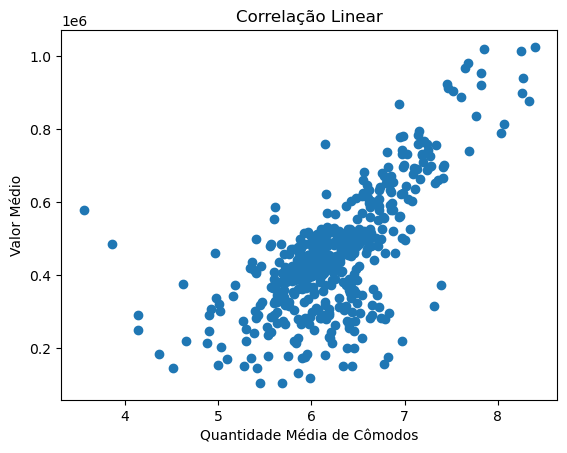

In [20]:
plt.scatter(df.RM, df.MEDV)
plt.title('Correlação Linear')
plt.xlabel('Quantidade Média de Cômodos')
plt.ylabel('Valor Médio')
plt.grid(False)

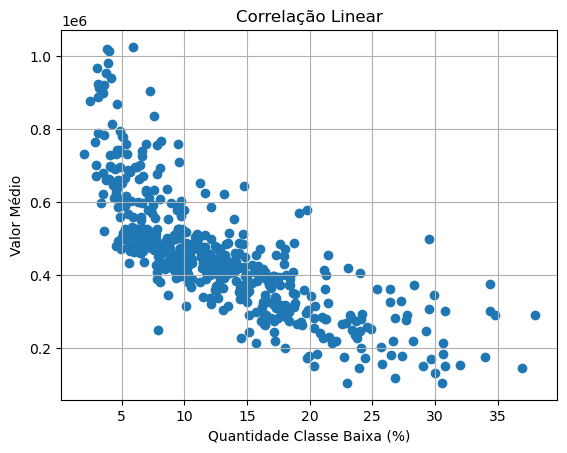

In [21]:
plt.scatter(df.LSTAT, df.MEDV)
plt.title('Correlação Linear')
plt.xlabel('Quantidade Classe Baixa (%)')
plt.ylabel('Valor Médio')
plt.grid(True)


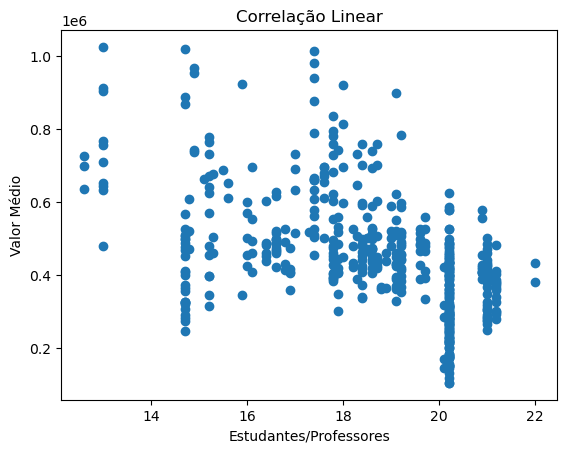

In [22]:
plt.scatter(df.PTRATIO, df.MEDV)
plt.title('Correlação Linear')
plt.xlabel('Estudantes/Professores')
plt.ylabel('Valor Médio')
plt.grid(False)

In [23]:
import seaborn as sns

KeyboardInterrupt: 

In [ ]:
sns.pairplot(df);

### Análise da Normalidade

Gráfico QQ-Plot

In [ ]:
import scipy.stats as stats

In [ ]:
stats.probplot(df['MEDV'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
hist =  px.histogram (df,  x = "MEDV", nbins=60) 
hist.update_layout(width=800,height=500,title_text='Média dos valores') 
hist.show()

In [ ]:
stats.probplot(df['RM'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
hist =  px.histogram (df,  x = "RM", nbins=40) 
hist.update_layout(width=800,height=500,title_text='Quantidade de cômodos') 
hist.show()

In [ ]:
stats.probplot(df['LSTAT'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
hist =  px.histogram (df,  x = "LSTAT", nbins=60) 
hist.update_layout(width=800,height=500,title_text='Quantidade de Classe Baixa (%)') 
hist.show()

In [ ]:
stats.probplot(df['PTRATIO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
hist =  px.histogram (df,  x = "PTRATIO", nbins=60) 
hist.update_layout(width=800,height=500,title_text='Relação Estudantes/Professores') 
hist.show()

Teste Shapiro-Wilk

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [ ]:
stats.shapiro(df.MEDV)

In [ ]:
estatistica, p = stats.shapiro(df.MEDV)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

In [ ]:
estatistica, p = stats.shapiro(df.RM)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

In [ ]:
estatistica, p = stats.shapiro(df.LSTAT)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

In [ ]:
estatistica, p = stats.shapiro(df.PTRATIO)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Teste Lilliefors (Kolmogorov_Sminorv)

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [ ]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.MEDV, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.RM, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

### Correlação Linear

Pearson (distribuição normal)

Spearman (distribuição não normal)

Kendall (distribuição não normal com quantidade pequena de amostras)

Ho = não há corrrelação linear: p > 0,05

Ha = existe correlação linear: p <= 0,05

In [ ]:
# Pearson
#coef,p = stats.pearsonr(df.MEDV, df.RM)
#print('Coeficiente de correlação: {}'.format(coef))
#print('p-valor: {}'.format(p))

In [ ]:
# Spearman
coef,p = stats.spearmanr(df.MEDV, df.PTRATIO)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

In [ ]:
# Kendall
#coef,p = stats.kendalltau(df.MEDV,df.RM)
#print('Coeficiente de correlação: {}'.format(coef))
#print('p-valor: {}'.format(p))

In [ ]:
correlacoes = df.corr(method='spearman')
correlacoes

In [ ]:
plt.figure()
sns.heatmap(correlacoes, annot=True);

## **REGRESSÃO LINEAR SIMPLES**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

### Valor médio (MEDV) em função do número de cômodos (RM)

In [ ]:
df.head(2)

In [ ]:
x1 = df.iloc[:,0:1].values
x1

In [ ]:
y = df.iloc[:, 3].values
y

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size = 0.3, random_state = 10)

In [ ]:
x_treino.shape, y_treino.shape

In [ ]:
x_teste.shape, y_teste.shape

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg_linear1 = LinearRegression()
reg_linear1.fit(x_treino, y_treino)

In [ ]:
# Intercepto (coeficiente linear)
reg_linear1.intercept_

In [ ]:
# Coeficiente Angular
reg_linear1.coef_

**Equação: Valor = -626510,27 + 173771,45.número_cômodos**

In [ ]:
# Coeficiente de Determinação dados de treino
reg_linear1.score(x_treino, y_treino)

In [ ]:
# Coeficiente de Determinação dados de teste
reg_linear1.score(x_teste, y_teste)

In [ ]:
previsoes_treino = reg_linear1.predict(x_treino)
previsoes_treino

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(3, 9)
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade Média de Cômodos')
plt.show()

In [ ]:
previsoes_teste = reg_linear1.predict(x_teste)
previsoes_teste

In [ ]:
y_teste

In [ ]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(4, 9)
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Cômodos')
plt.show()

In [ ]:
# Fazendo previsões para valores distintos
valor_casa = reg_linear1.predict([[4]])
valor_casa

**Métricas de Desempenho**

In [ ]:
# Erro absoluto
abs(y_teste - previsoes_teste).mean()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio absoluto
mean_absolute_error(y_teste, previsoes_teste)

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

In [ ]:
# Raiz do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

### Valor médio (MEDV) em função da classe social (LSTAT)

In [ ]:
df.head(2)

In [ ]:
x2 = df.iloc[:,1:2].values
x2

In [ ]:
y = df.iloc[:, 3].values
y

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x2, y, test_size = 0.3, random_state = 10)

In [ ]:
x_treino.shape, y_treino.shape

In [ ]:
x_teste.shape, y_teste.shape

In [ ]:
from sklearn.linear_model import LinearRegression
reg_linear2 = LinearRegression()
reg_linear2.fit(x_treino, y_treino)

In [ ]:
# Intercepto (coeficiente linear)
reg_linear2.intercept_

In [ ]:
# Coeficiente Angular
reg_linear2.coef_

**Equação: Valor = 681977,75 - 17263,75.LSTAT**

In [ ]:
# Coeficiente de Determinação dados de treino
reg_linear2.score(x_treino, y_treino)

In [ ]:
previsoes_treino = reg_linear2.predict(x_treino)
previsoes_treino

In [ ]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(0, 40)
plt.plot(X_plot, X_plot*reg_linear2.coef_ + reg_linear2.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Proprietários de Classe Média Baixa (%)')
plt.show()

In [ ]:
previsoes_teste = reg_linear2.predict(x_teste)
previsoes_teste

In [ ]:
y_teste

In [ ]:
# Coeficiente de Determinação dados de teste
reg_linear2.score(x_teste, y_teste)

In [ ]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(2, 35)
plt.plot(X_plot, X_plot*reg_linear2.coef_ + reg_linear2.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Proprietários de Classe Média Baixa (%)')
plt.show()

In [ ]:
# Fazendo previsões para valores distintos
valor_casa = reg_linear2.predict([[25]])
valor_casa

**Métricas de Desempenho**

In [ ]:
# Erro absoluto
abs(y_teste - previsoes_teste).mean()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, x2, y, cv = kfold)
resultado

In [ ]:
# Usamos a média e o desvio padrão
print("Coef. determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

## **REGRESSÃO LINEAR MÚLTIPLA**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df.head(2)

In [ ]:
independente = df.iloc[:, 0:3].values
independente

In [ ]:
independente.shape

In [ ]:
dependente = df.iloc[:, 3].values
dependente

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

In [ ]:
multipla = LinearRegression()
multipla.fit(x_treino, y_treino)

In [ ]:
multipla.intercept_

In [ ]:
multipla.coef_

In [ ]:
print("Equação: Valor = {:.2f} + ({:.2f})*RM + ({:.2f})*LSTAT + ({:.2f})*PTRATIO".format(multipla.intercept_, multipla.coef_[0], multipla.coef_[1], multipla.coef_[2]))

In [ ]:
# Coeficiente de Determinação
multipla.score(x_treino, y_treino)

**TESTE**

In [ ]:
previsoes = multipla.predict(x_teste)
previsoes

In [ ]:
y_teste

In [ ]:
# Coeficiente de Determinação
multipla.score(x_teste, y_teste)

In [ ]:
# Fazendo previsões para valores distintos
valor_casa = multipla.predict([[6,20,12]])
valor_casa

**MÉTRICAS**

In [ ]:
# Erro absoluto
abs(y_teste - previsoes).mean()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes)

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes)

In [ ]:
# Raiz do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, previsoes))

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

## **REGRESSÃO POLINOMIAL**

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html 

Valor médio (MEDV) em função do número de cômodos (RM)

In [ ]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [ ]:
x1 = df.iloc[:,0:1].values
x1

In [ ]:
y = df.iloc[:, 3].values
y

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, y_treino.shape

((342, 1), (342,))

In [ ]:
x_teste.shape, y_teste.shape

((147, 1), (147,))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
# Pré Processamento
grau_polinomial =PolynomialFeatures(degree=2)

In [ ]:
x_poly = grau_polinomial.fit_transform(x_treino)
x_poly

array([[ 1.      ,  6.266   , 39.262756],
       [ 1.      ,  6.951   , 48.316401],
       [ 1.      ,  6.619   , 43.811161],
       ...,
       [ 1.      ,  6.021   , 36.252441],
       [ 1.      ,  6.03    , 36.3609  ],
       [ 1.      ,  6.02    , 36.2404  ]])

In [ ]:
polinomial = LinearRegression()

In [ ]:
polinomial.fit(x_poly, y_treino)

LinearRegression()

In [ ]:
previsoes_treino = polinomial.predict(x_poly)

In [ ]:
polinomial.coef_

array([      0.        , -568528.11104731,   60092.59048475])

In [ ]:
polinomial.intercept_

1640107.0085836346

**Equação:**

Valor = 1640107 - 568528.11*RM + 60092.59*RM^2

In [ ]:
numeros = np.linspace(3,9.84,342)
numeros

In [ ]:
numeros.shape

(342,)

In [ ]:
valor = 1640107 -568528.11*numeros + 60092.59*numeros**2

In [ ]:
import matplotlib.pyplot as plt

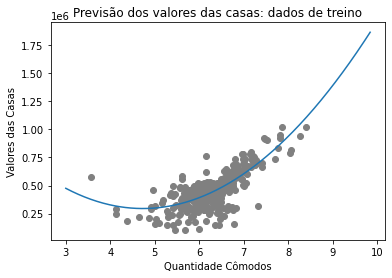

In [ ]:
plt.scatter(x_treino, y_treino, c = "gray")
plt.xlabel("Quantidade Cômodos")
plt.ylabel("Valores das Casas")
plt.title("Previsão dos valores das casas: dados de treino")
plt.plot(numeros, valor);

In [ ]:
# Fazendo previsões para valores distintos
comodos = 6
valor = 1640107 -568528.11*comodos + 60092.59*comodos**2
valor

392271.5799999996

In [ ]:
# Coeficiente de Determinação dados de treino
polinomial.score(x_poly, y_treino)

0.5864656525780776

**TESTE**

In [ ]:
numeros2 = np.linspace(3,8.88,147)
numeros2

array([3.        , 3.04027397, 3.08054795, 3.12082192, 3.16109589,
       3.20136986, 3.24164384, 3.28191781, 3.32219178, 3.36246575,
       3.40273973, 3.4430137 , 3.48328767, 3.52356164, 3.56383562,
       3.60410959, 3.64438356, 3.68465753, 3.72493151, 3.76520548,
       3.80547945, 3.84575342, 3.8860274 , 3.92630137, 3.96657534,
       4.00684932, 4.04712329, 4.08739726, 4.12767123, 4.16794521,
       4.20821918, 4.24849315, 4.28876712, 4.3290411 , 4.36931507,
       4.40958904, 4.44986301, 4.49013699, 4.53041096, 4.57068493,
       4.6109589 , 4.65123288, 4.69150685, 4.73178082, 4.77205479,
       4.81232877, 4.85260274, 4.89287671, 4.93315068, 4.97342466,
       5.01369863, 5.0539726 , 5.09424658, 5.13452055, 5.17479452,
       5.21506849, 5.25534247, 5.29561644, 5.33589041, 5.37616438,
       5.41643836, 5.45671233, 5.4969863 , 5.53726027, 5.57753425,
       5.61780822, 5.65808219, 5.69835616, 5.73863014, 5.77890411,
       5.81917808, 5.85945205, 5.89972603, 5.94      , 5.98027

In [ ]:
numeros2.shape

(147,)

In [ ]:
valor2 = 1640107 -568528.11*numeros2 + 60092.59*numeros2**2

In [ ]:
import matplotlib.pyplot as plt

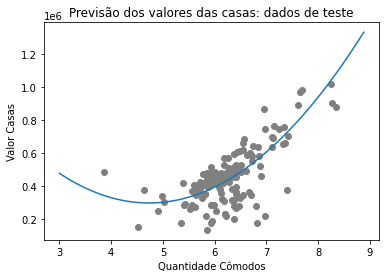

In [ ]:
plt.scatter(x_teste, y_teste, c = "gray")
plt.xlabel("Quantidade Cômodos")
plt.ylabel("Valor Casas")
plt.title("Previsão dos valores das casas: dados de teste")
plt.plot(numeros2, valor2);

In [ ]:
x_poly_teste = grau_polinomial.fit_transform(x_teste)
x_poly_teste

In [ ]:
polinomial_teste = LinearRegression()

In [ ]:
polinomial_teste.fit(x_poly_teste, y_teste)

LinearRegression()

In [ ]:
# Coeficiente de Determinação dados de teste
polinomial.score(x_poly_teste, y_teste)

0.5391879530755566

In [ ]:
previsoes_teste = polinomial_teste.predict(x_poly_teste)

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

88894.00551287511

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

13149352560.413319

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

114670.6264063004

**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

## **REGRESSÃO POR VETORES DE SUPORTE**

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html 

In [ ]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [ ]:
independente = df.iloc[:, 0:3].values
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [ ]:
independente.shape

(489, 3)

In [ ]:
dependente = df.iloc[:, 3].values
dependente

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [ ]:
# kernel = rbf, linear, polinomial (poly)
from sklearn.svm import SVR
SVR = SVR(kernel='rbf')
SVR.fit(x_treino,y_treino)

SVR()

In [ ]:
SVR.score(x_treino, y_treino)

-0.006148700884580638

In [ ]:
SVR.score(x_teste, y_teste)

-0.0029977270958452262

**Padronização de escala**

In [ ]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
x_treino_scaler = x_scaler.fit_transform(x_treino)

In [ ]:
x_treino_scaler

array([[ 0.05327517, -0.70150711, -0.05467118],
       [ 1.12799963, -0.44487061, -0.52922816],
       [ 0.60711128, -0.79792304,  0.230063  ],
       ...,
       [-0.33111532, -0.36121561, -0.33940537],
       [-0.31699486,  0.84398345, -0.29194967],
       [-0.33268427, -0.38815536, -0.90887374]])

In [ ]:
y_scaler = StandardScaler()
y_treino_scaler = y_scaler.fit_transform(y_treino.reshape(-1,1))

In [ ]:
y_treino_scaler

array([[-1.05925606e-02],
       [ 6.46900118e-01],
       [ 2.85923746e-01],
       [-1.13728667e-01],
       [ 1.44111599e-01],
       [-7.84113359e-01],
       [-1.24822584e+00],
       [-2.81324840e-01],
       [-1.39512694e-01],
       [-1.01616960e+00],
       [ 2.00056152e+00],
       [ 1.21414870e+00],
       [ 1.27860877e+00],
       [-1.52404707e-01],
       [ 9.04740384e-01],
       [ 2.29945267e-03],
       [-2.81324840e-01],
       [ 2.73031732e-01],
       [-2.81324840e-01],
       [ 2.73031732e-01],
       [ 4.27735892e-01],
       [ 2.60139719e-01],
       [-1.06773765e+00],
       [-1.17087376e+00],
       [ 3.49603506e+00],
       [ 9.04740384e-01],
       [-2.07331469e+00],
       [ 1.69895626e-01],
       [ 4.27735892e-01],
       [ 2.76119030e+00],
       [-3.45784907e-01],
       [ 2.73031732e-01],
       [-1.48028208e+00],
       [ 1.57003612e-01],
       [-1.91080747e-01],
       [-1.01616960e+00],
       [ 3.37491799e-01],
       [-2.34845740e-02],
       [ 1.9

In [ ]:
x_teste_scaler = x_scaler.transform(x_teste)
x_teste_scaler

In [ ]:
y_teste_scaler = y_scaler.transform(y_teste.reshape(-1,1))
y_teste_scaler

In [ ]:
from sklearn.svm import SVR
SVR2 = SVR(kernel='rbf')
SVR2.fit(x_treino_scaler, y_treino_scaler.ravel())

# .ravel() é para retornar matriz 1D

SVR()

In [ ]:
SVR2.score(x_treino_scaler, y_treino_scaler)

0.8714780218682298

**TESTE**

In [ ]:
SVR2.score(x_teste_scaler, y_teste_scaler)

0.8141963480712318

In [ ]:
previsoes_teste = SVR2.predict(x_teste_scaler)
previsoes_teste

In [ ]:
y_teste_scaler

**Revertendo a transformação**

In [ ]:
y_teste_inverse = y_scaler.inverse_transform(y_teste_scaler)
previsoes_inverse = y_scaler.inverse_transform(previsoes_teste.reshape(-1, 1))

In [ ]:
y_teste_inverse

In [ ]:
previsoes_inverse

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste_inverse, previsoes_inverse)

54733.899498823375

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste_inverse, previsoes_inverse)

5390892216.930902

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste_inverse, previsoes_inverse))

73422.6955166514

### **Validação Cruzada**

**Padronização de escala**

In [ ]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler()
independente_scaler = x.fit_transform(independente)

In [ ]:
independente_scaler

array([[ 0.52055395, -1.1250769 , -1.5250831 ],
       [ 0.28104837, -0.53706982, -0.33974768],
       [ 1.46924486, -1.25935736, -0.33974768],
       ...,
       [ 1.14420158, -1.03178731,  1.17748167],
       [ 0.86114953, -0.91305511,  1.17748167],
       [-0.32704695, -0.71516812,  1.17748167]])

In [ ]:
y = StandardScaler()
dependente_scaler = y.fit_transform(dependente.reshape(-1,1))

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from sklearn.svm import SVR
modelo = SVR(kernel='rbf')
resultado = cross_val_score(modelo, independente_scaler, dependente_scaler.ravel(), cv = kfold)
resultado

array([0.92812888, 0.84684121, 0.77550142, 0.84579676, 0.87130224,
       0.73027848, 0.8773257 , 0.8323081 , 0.81165058, 0.86738849,
       0.91428868, 0.65473478, 0.78365184, 0.83876782, 0.77741225])

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação médio: 82.37%


**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

## **REGRESSÃO COM ÁRVORE DE DECISÃO**

https://scikit-learn.org/stable/modules/tree.html#regression 

In [ ]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [ ]:
independente = df.iloc[:, 0:3].values
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [ ]:
independente.shape

(489, 3)

In [ ]:
dependente = df.iloc[:, 3].values
dependente

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [ ]:
dependente.shape

(489,)

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [ ]:
y_treino.shape, y_teste.shape

((342,), (147,))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
arvore = DecisionTreeRegressor(max_depth=5, random_state=10)
arvore.fit(x_treino, y_treino)

DecisionTreeRegressor(max_depth=5, random_state=10)

In [ ]:
arvore.score(x_treino, y_treino)

0.9050951127606555

**TESTE**

In [ ]:
arvore.score(x_teste, y_teste)

0.8256951550328737

In [ ]:
previsoes_teste = arvore.predict(x_teste)
previsoes_teste

In [ ]:
y_teste

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

52954.00426293284

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

5057266756.343771

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

71114.46235713077

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor(max_depth=5, random_state=10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.9107871 , 0.91994845, 0.70416127, 0.79571349, 0.64537243,
       0.62424022, 0.83188854, 0.77916943, 0.74608406, 0.45125985,
       0.92525406, 0.72678715, 0.72120525, 0.84170908, 0.56581873])

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 74.60%


**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0,91/0,83; RMSE = 71114,5. R^2 Validação Cruzada: 74,60%.

## **REGRESSÃO COM RANDOM FOREST**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html 

In [ ]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [ ]:
independente = df.iloc[:, 0:3].values
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [ ]:
independente.shape

(489, 3)

In [ ]:
dependente = df.iloc[:, 3].values
dependente

In [ ]:
dependente.shape

(489,)

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [ ]:
y_treino.shape, y_teste.shape

((342,), (147,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random = RandomForestRegressor(n_estimators=60, criterion='squared_error', max_depth=5, random_state = 10)
random.fit(x_treino, y_treino)

RandomForestRegressor(max_depth=5, n_estimators=60, random_state=10)

In [ ]:
random.score(x_treino, y_treino)

0.9160346630571496

**TESTE**

In [ ]:
random.score(x_teste, y_teste)

0.8465287311346861

In [ ]:
previsoes_teste = random.predict(x_teste)
previsoes_teste

array([429790.1184383 , 626425.24570752, 319291.        , 369687.79212278,
       504007.08094948, 275038.77411657, 325784.08333333, 419935.2164072 ,
       461145.73252911, 407252.93004329, 250872.39578869, 342808.74084789,
       454388.83705035, 207628.59742739, 523389.0588747 , 343148.06749092,
       436277.53376586, 519168.2986373 , 400302.89135561, 591299.21535976,
       617998.62691853, 737021.36549068, 207628.59742739, 433990.65598718,
       378602.16484354, 911394.60227273, 690510.8130319 , 913862.10227273,
       420589.43787112, 423405.52420844, 326646.08924392, 380183.19387172,
       436732.30908567, 687715.29521126, 434483.34195931, 890163.5       ,
       529306.19369936, 231323.99610428, 491146.52058414, 505014.08035269,
       256106.89211222, 382749.3212387 , 424659.14608592, 488901.56840275,
       401002.16125623, 406066.93224785, 503825.27539393, 325390.61402888,
       856473.33333333, 421515.20723289, 693269.282585  , 434272.60667474,
       558379.53436472, 3

In [ ]:
y_teste

array([ 417900.,  632100.,  281400.,  577500.,  474600.,  359100.,
        247800.,  474600.,  449400.,  411600.,  214200.,  214200.,
        428400.,  375900.,  577500.,  327600.,  420000.,  489300.,
        470400.,  640500.,  651000.,  690900.,  147000.,  441000.,
        367500.,  966000.,  756000.,  888300.,  455700.,  445200.,
        323400.,  455700.,  430500.,  867300.,  445200.,  875700.,
        415800.,  268800.,  590100.,  497700.,  231000.,  315000.,
        388500.,  449400.,  413700.,  352800.,  453600.,  306600.,
        898800.,  514500.,  743400.,  474600.,  600600.,  304500.,
        661500.,  489300.,  422100.,  184800.,  525000.,  249900.,
        407400.,  361200.,  428400.,  392700.,  428400.,  472500.,
        258300.,  550200.,  346500.,  199500.,  302400.,  611100.,
        396900.,  585900.,  279300.,  483000.,  462000.,  218400.,
        518700.,  420000.,  392700.,  980700.,  455700.,  514500.,
        480900.,  520800.,  485100.,  525000.,  390600.,  5691

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

49730.29595322481

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

4452803054.515374

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

66729.326795011

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(n_estimators=60, criterion='squared_error', max_depth=5, random_state = 10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.9390087 , 0.9048205 , 0.78576987, 0.78178487, 0.80471035,
       0.73189206, 0.88019637, 0.85442545, 0.7796746 , 0.82002933,
       0.93538902, 0.72717569, 0.80683864, 0.8863317 , 0.78974059])

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 82.85%


**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0,91/0,83; RMSE = 71114,5. R^2 Validação Cruzada: 74,60%.

**REGRESSÃO COM RANDOM FOREST:** R^2 = 0,92/0,85; RMSE = 66729,3. R^2 Validação Cruzada: 82,85%.

## **REGRESSÃO COM XGBOOST**

https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor 

In [ ]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [ ]:
independente = df.iloc[:, 0:3].values
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [ ]:
independente.shape

(489, 3)

In [ ]:
dependente = df.iloc[:, 3].values

In [ ]:
dependente.shape

(489,)

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgboost = XGBRegressor(n_estimators=180, max_depth=3, learning_rate=0.05, objective="reg:squarederror", random_state=10)
xgboost.fit(x_treino, y_treino)

XGBRegressor(learning_rate=0.05, n_estimators=180, objective='reg:squarederror',
             random_state=10)

In [ ]:
xgboost.score(x_treino, y_treino)

0.9269256727642161

**TESTE**

In [ ]:
xgboost.score(x_teste, y_teste)

0.8416164650842644

In [ ]:
previsoes_teste = xgboost.predict(x_teste)

In [ ]:
# Fazendo previsões para valores distintos
valor_casa = xgboost.predict([[6,20,12]])
valor_casa

array([368061.16], dtype=float32)

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

51063.76605017007

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

67788.84234677578

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from xgboost import XGBRegressor
modelo = XGBRegressor(n_estimators=180, max_depth=3, learning_rate=0.05, objective = "reg:squarederror")
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.95352272, 0.90664315, 0.77445699, 0.79897621, 0.83737888,
       0.71638268, 0.90830893, 0.83769017, 0.83258437, 0.84008661,
       0.9032208 , 0.71795708, 0.76351618, 0.89191949, 0.79971926])

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de determinação Médio: 83.22%


**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0,91/0,83; RMSE = 71114,5. R^2 Validação Cruzada: 74,60%.

**REGRESSÃO COM RANDOM FOREST:** R^2 = 0,92/0,85; RMSE = 66729,3. R^2 Validação Cruzada: 82,85%.

**REGRESSÃO COM XGBOOST:** R^2 = 0,93/0,84; RMSE = 67788,8. R^2 Validação Cruzada: 83,22%.

## **REGRESSÃO COM LIGHT GBM**

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html 

In [ ]:
# Instalação do Algoritmo
!pip install lightgbm

In [ ]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [ ]:
independente = df.iloc[:, 0:3].values
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [ ]:
independente.shape

(489, 3)

In [ ]:
dependente = df.iloc[:, 3].values

In [ ]:
dependente.shape

(489,)

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [ ]:
import lightgbm as lgb

In [ ]:
lgbm = lgb.LGBMRegressor(num_leaves=50, max_depth=3, learning_rate=0.1, n_estimators=50, random_state=10)
lgbm.fit(x_treino, y_treino)

LGBMRegressor(max_depth=3, n_estimators=50, num_leaves=50, random_state=10)

In [ ]:
lgbm.score(x_treino, y_treino)

0.8814914688459106

**TESTE**

In [ ]:
lgbm.score(x_teste, y_teste)

0.821790912114666

In [ ]:
previsoes_teste = lgbm.predict(x_teste)

In [ ]:
# Fazendo previsões para valores distintos
valor_casa = lgbm.predict([[8,12,25]])
valor_casa

array([473777.6547499])

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

55114.09314449551

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

71906.49585704789

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
import lightgbm as lgb
modelo = lgb.LGBMRegressor(num_leaves=50, max_depth=3, learning_rate=0.1, n_estimators=50)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.92885902, 0.87411091, 0.79183715, 0.82557057, 0.84077803,
       0.69153561, 0.8972966 , 0.853766  , 0.78817415, 0.84598833,
       0.9151854 , 0.680427  , 0.7801631 , 0.86306132, 0.78006315])

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 82.38%


**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0,91/0,83; RMSE = 71114,5. R^2 Validação Cruzada: 74,60%.

**REGRESSÃO COM RANDOM FOREST:** R^2 = 0,92/0,85; RMSE = 66729,3. R^2 Validação Cruzada: 82,85%.

**REGRESSÃO COM XGBOOST:** R^2 = 0,93/0,84; RMSE = 67788,8. R^2 Validação Cruzada: 83,22%.

**REGRESSÃO COM LIGHT GBM:** R^2 = 0,88/0,82; RMSE = 71906,4. R^2 Validação Cruzada: 82,38%.

## **REGRESSÃO COM CATBOOST**

https://catboost.ai/en/docs/concepts/python-reference_catboostregressor 

In [ ]:
#Instalação
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [ ]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [ ]:
independente = df.iloc[:, 0:3].values
independente

In [ ]:
independente.shape

(489, 3)

In [ ]:
dependente = df.iloc[:, 3].values

In [ ]:
dependente.shape

(489,)

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [ ]:
from catboost.core import CatBoostRegressor

In [ ]:
catboost = CatBoostRegressor (iterations=100, learning_rate=0.08, depth = 5, random_state = 10)
catboost.fit(x_treino, y_treino)

In [ ]:
catboost.score(x_treino, y_treino)

0.8987749049972403

**TESTE**

In [ ]:
catboost.score(x_teste, y_teste)

0.8356524921108562

In [ ]:
previsoes_teste = catboost.predict(x_teste)

In [ ]:
# Fazendo previsões para valores distintos
valor_casa = catboost.predict([[5,18,20]])
valor_casa

array([328451.4683164])

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

52043.380841851125

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

69053.3516855943

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from catboost.core import CatBoostRegressor
modelo = CatBoostRegressor (iterations=100, learning_rate=0.08, depth = 5, random_state = 10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 83.40%


**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0,91/0,83; RMSE = 71114,5. R^2 Validação Cruzada: 74,60%.

**REGRESSÃO COM RANDOM FOREST:** R^2 = 0,92/0,85; RMSE = 66729,3. R^2 Validação Cruzada: 82,85%.

**REGRESSÃO COM XGBOOST:** R^2 = 0,93/0,84; RMSE = 67788,8. R^2 Validação Cruzada: 83,22%.

**REGRESSÃO COM LIGHT GBM:** R^2 = 0,88/0,82; RMSE = 71906,4. R^2 Validação Cruzada: 82,38%.

**REGRESSÃO COM CATBOOST:** R^2 = 0,90/0,84; RMSE = 69053,3 R^2 Validação Cruzada: 83,40%.

# **Salvando dados para Deploy**

In [ ]:
independente = df.iloc[:, 0:3].values
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [ ]:
dependente = df.iloc[:, 3].values
dependente

In [ ]:
np.savetxt('independente.csv', independente, delimiter=',')

In [ ]:
np.savetxt('dependente.csv', dependente, delimiter=',')

# **DESAFIO 2**

DESENVOLVER E SELECIONAR O MELHOR ALGORITMO DE MACHINE LEARNING DE REGRESSÃO PARA O DATASET DO LINK A SEGUIR:

https://www.kaggle.com/mirichoi0218/insurance/code